In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
# Impor fungsi preprocessing VGG16 (PENTING UNTUK PERBAIKAN)
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os # Untuk mengelola path file
from PIL import Image, ImageOps # Untuk memproses gambar
import cv2 # Kadang diperlukan, tapi kita utamakan PIL

# Cek versi (opsional)
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Bentuk data latih CNN: (60000, 28, 28, 1)

Contoh data MNIST setelah pra-pemrosesan:


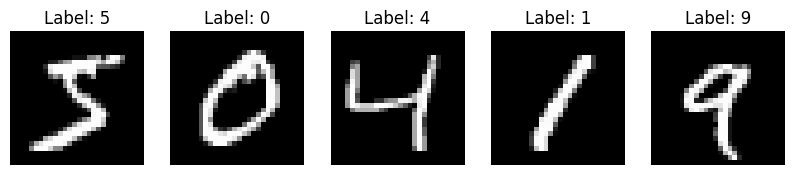

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

x_train_cnn = np.expand_dims(x_train_norm, -1)
x_test_cnn = np.expand_dims(x_test_norm, -1)
print(f"Bentuk data latih CNN: {x_train_cnn.shape}") # (60000, 28, 28, 1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("\nContoh data MNIST setelah pra-pemrosesan:")
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Model: "Model_A_CNN_dari_Nol"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


Memulai pelatihan Model A...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.8689 - loss: 0.4622 - val_accuracy: 0.9789 - val_loss: 0.0702
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9807 - loss: 0.0602 - val_accuracy: 0.9853 - val_loss: 0.0500
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9870 - loss: 0.0415 - val_accuracy: 0.9875 - val_loss: 0.0424
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9872 - val_loss: 0.0445
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9891 - val_loss: 0.0371
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9956 - loss: 0.0128 - val_accuracy: 0.9893 - val_loss: 0.0379
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accu

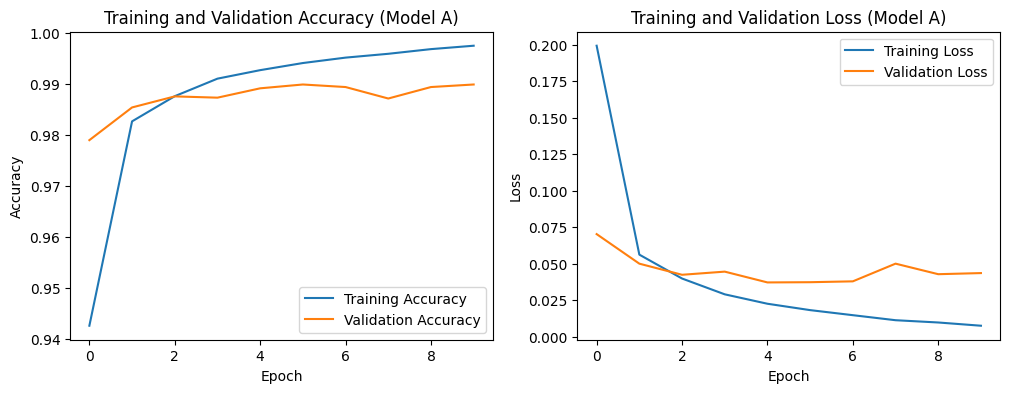

In [4]:
# 1. Rancang Arsitektur Model A
model_A = Sequential(name="Model_A_CNN_dari_Nol")
model_A.add(Input(shape=(28, 28, 1)))
model_A.add(Conv2D(32, (3, 3), activation='relu'))
model_A.add(MaxPooling2D((2, 2)))
model_A.add(Conv2D(64, (3, 3), activation='relu'))
model_A.add(MaxPooling2D((2, 2)))
model_A.add(Flatten())
model_A.add(Dense(64, activation='relu'))
model_A.add(Dense(10, activation='softmax')) # 10 kelas output (0-9)

# 2. Kompilasi Model A
model_A.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_A.summary()

# 3. Latih Model A
print("\nMemulai pelatihan Model A...")
history_A = model_A.fit(
    x_train_cnn,
    y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)
print("Pelatihan Model A selesai.")

# 4. Plot Training History Model A
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_A.history['accuracy'], label='Training Accuracy')
plt.plot(history_A.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model A)')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_A.history['loss'], label='Training Loss')
plt.plot(history_A.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model A)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()


Memproses gambar tulisan tangan untuk Model A...
Error memproses gambar data_nim/nol_10.jpg: [Errno 2] No such file or directory: 'data_nim/nol_10.jpg'
Error memproses gambar data_nim/enam_10.jpg: [Errno 2] No such file or directory: 'data_nim/enam_10.jpg'
Error memproses gambar data_nim/sembilan_10.jpg: [Errno 2] No such file or directory: 'data_nim/sembilan_10.jpg'
Total gambar yang berhasil diproses: 27

Visualisasi 5 contoh untuk setiap angka (0, 6, 9)...


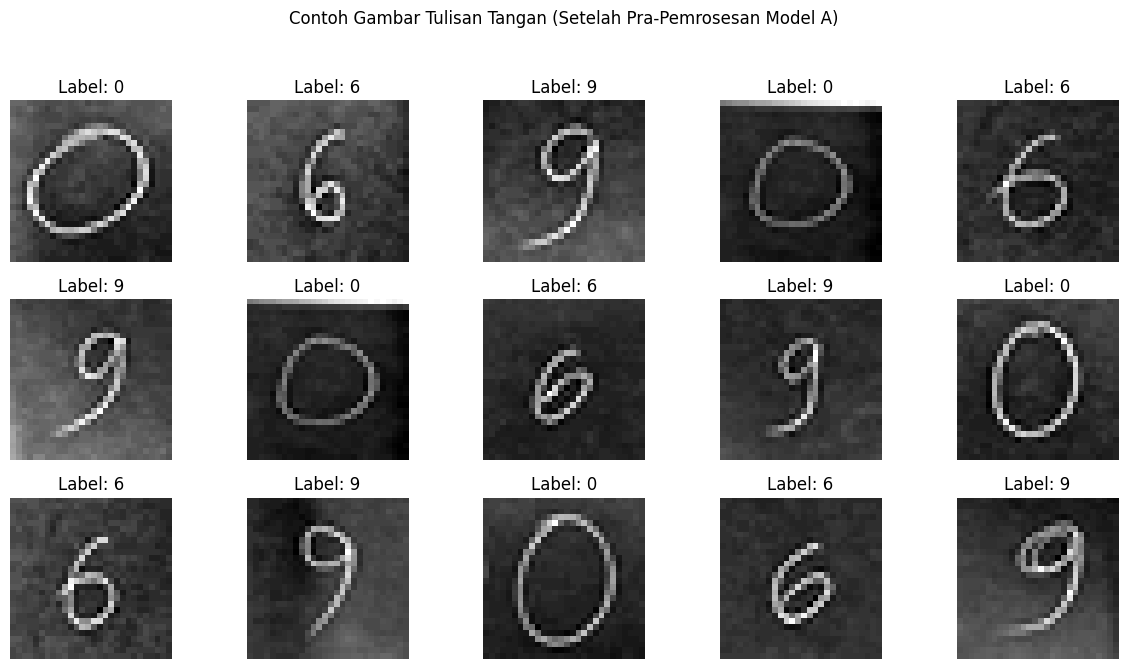


--- Evaluasi Model A (CNN dari Nol) ---
Citra ke-1 (Label Asli: 0): Prediksi Model A: 1 (Salah)
Citra ke-2 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-3 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-4 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-5 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-6 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-7 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-8 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-9 (Label Asli: 0): Prediksi Model A: 0 (Benar)
Citra ke-10 (Label Asli: 6): Prediksi Model A: 6 (Benar)
Citra ke-11 (Label Asli: 6): Prediksi Model A: 5 (Salah)
Citra ke-12 (Label Asli: 6): Prediksi Model A: 0 (Salah)
Citra ke-13 (Label Asli: 6): Prediksi Model A: 1 (Salah)
Citra ke-14 (Label Asli: 6): Prediksi Model A: 6 (Benar)
Citra ke-15 (Label Asli: 6): Prediksi Model A: 0 (Salah)
Citra ke-16 (Label Asli: 6): Prediksi Model A: 5 (Salah)
Citra ke-17 (Label Asli: 6): Prediksi Model A: 6 (Benar)

In [5]:
# 1. Fungsi Pra-pemrosesan untuk Model A
def preprocess_image_model_A(image_path):
    """
    Memuat gambar, inversi, resize 28x28, normalisasi [0,1], dan reshape.
    """
    try:
        img = Image.open(image_path).convert('L')
        img = ImageOps.invert(img)
        img = img.resize((28, 28), Image.Resampling.LANCZOS)
        img_array = np.array(img).astype('float32') / 255.0
        img_processed = np.expand_dims(img_array, axis=(0, -1)) # (1, 28, 28, 1)
        return img_processed
    except Exception as e:
        print(f"Error memproses gambar {image_path}: {e}")
        return None

# 2. Setup Path (SESUAIKAN JIKA PERLU)
image_folder = 'data_nim/'
image_files = {
    "nol": [f"nol_{i}.jpg" for i in range(1, 11)],
    "enam": [f"enam_{i}.jpg" for i in range(1, 11)],
    "sembilan": [f"sembilan_{i}.jpg" for i in range(1, 11)]
}
ground_truth_labels = {"nol": 0, "enam": 6, "sembilan": 9}

# 3. Proses Gambar Anda
processed_images_A = []
true_labels_A = []
print("\nMemproses gambar tulisan tangan untuk Model A...")
for label_name, filenames in image_files.items():
    true_label = ground_truth_labels[label_name]
    for filename in filenames:
        img_path = os.path.join(image_folder, filename)
        img_data = preprocess_image_model_A(img_path)
        if img_data is not None:
            processed_images_A.append(img_data)
            true_labels_A.append(true_label)
print(f"Total gambar yang berhasil diproses: {len(processed_images_A)}")

# 4. Visualisasi (Grid 3x5)
print("\nVisualisasi 5 contoh untuk setiap angka (0, 6, 9)...")
labels_array = np.array(true_labels_A)
indices_to_plot = []
try:
    indices_0 = np.where(labels_array == 0)[0][:5]
    indices_6 = np.where(labels_array == 6)[0][:5]
    indices_9 = np.where(labels_array == 9)[0][:5]

    if len(indices_0) == 5 and len(indices_6) == 5 and len(indices_9) == 5:
        for i in range(5):
            indices_to_plot.extend([indices_0[i], indices_6[i], indices_9[i]])

        plt.figure(figsize=(12, 7))
        for i, img_index in enumerate(indices_to_plot):
            plt.subplot(3, 5, i + 1)
            plt.imshow(processed_images_A[img_index].reshape(28, 28), cmap='gray')
            plt.title(f"Label: {true_labels_A[img_index]}")
            plt.axis('off')
        plt.suptitle("Contoh Gambar Tulisan Tangan (Setelah Pra-Pemrosesan Model A)")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print("Peringatan: Tidak ditemukan 5 gambar untuk setiap label (0, 6, 9).")
except Exception as e:
    print(f"Error saat visualisasi: {e}")

# 5. Prediksi dan Hitung Akurasi Model A
predictions_A = []
correct_count_A = 0
print("\n--- Evaluasi Model A (CNN dari Nol) ---")
for i, img_data in enumerate(processed_images_A):
    # PERBAIKAN: Menambahkan verbose=0 agar output bersih
    pred_probs = model_A.predict(img_data, verbose=0)
    pred_label = np.argmax(pred_probs)
    predictions_A.append(pred_label)

    is_correct = (pred_label == true_labels_A[i])
    if is_correct:
        correct_count_A += 1
    print(f"Citra ke-{i+1} (Label Asli: {true_labels_A[i]}): Prediksi Model A: {pred_label} ({'Benar' if is_correct else 'Salah'})")

# Simpan hasil akurasi untuk perbandingan nanti
if len(true_labels_A) > 0:
    accuracy_A = (correct_count_A / len(true_labels_A)) * 100
    print(f"\nAkurasi Model A pada {len(true_labels_A)} Gambar Tulisan Tangan: {accuracy_A:.2f}%")
else:
    print("\nTidak ada gambar yang diproses. Evaluasi dibatalkan.")
    accuracy_A = 0.0


--- Memulai Tahap 4 (VERSI PERBAIKAN) ---
Memproses ulang data MNIST untuk VGG16 (32x32x3)...
Menerapkan VGG16 preprocess_input ke data MNIST...
Bentuk data latih baru (VGG): (60000, 32, 32, 3)

Memuat base model VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "Model_B_Transfer_Learning_VGG16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Memulai pelatihan Model B...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 739s 786ms/step - accuracy: 0.7878 - loss: 1.2784 - val_accuracy: 0.9055 - val_loss: 0.2890
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 776s 823ms/step - accuracy: 0.9271 - loss: 0.2282 - val_accuracy: 0.9321 - val_loss: 0.2205
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 738s 787ms/step - accuracy: 0.9373 - loss: 0.1938 - val_accuracy: 0.9430 - val_loss: 0.1791
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 777s 825ms/step - accuracy: 0.9471 - loss: 0.1653 - val_accuracy: 0.9390 - val_loss: 0.1922
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 774s 825ms/step - accuracy: 0.9512 - loss: 0.1520 - val_accuracy: 0.9461 - val_loss: 0.1722
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 726s 774ms/step - accuracy: 0.9550 - loss: 0.1366 - val_accuracy: 0.9500 - val_loss: 0.1545
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 767s 818ms/step - accuracy: 0.9585 - loss: 0.1259 - val_accuracy: 0.9533 - val_loss: 0.1529
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 769s 8

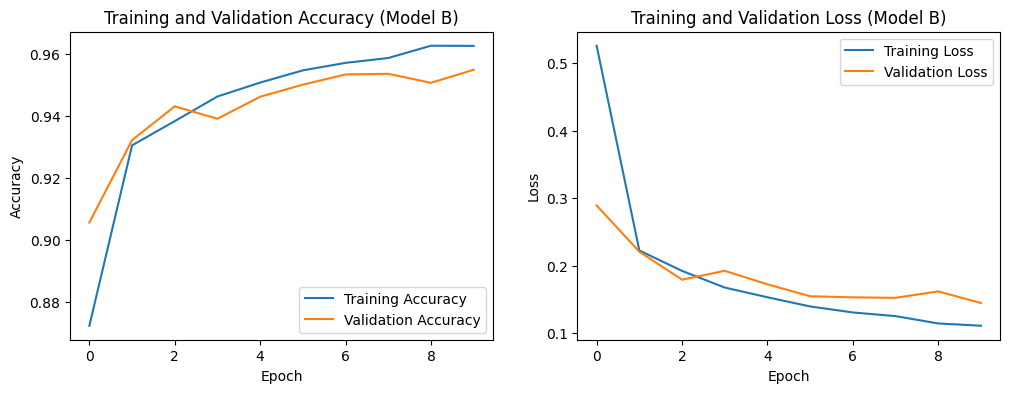

In [6]:
print("\n--- Memulai Tahap 4 ---")

# 1. Pra-pemrosesan Ulang Data MNIST untuk VGG16
print("Memproses ulang data MNIST untuk VGG16 (32x32x3)...")
# Resize dari 28x28 ke 32x32
x_train_vgg = tf.image.resize(x_train_cnn, (32, 32))
x_test_vgg = tf.image.resize(x_test_cnn, (32, 32))
# Konversi Grayscale ke RGB
x_train_vgg = tf.image.grayscale_to_rgb(x_train_vgg)
x_test_vgg = tf.image.grayscale_to_rgb(x_test_vgg)

# PERBAIKAN: Kembalikan ke rentang [0, 255]
x_train_vgg_255 = x_train_vgg * 255.0
x_test_vgg_255 = x_test_vgg * 255.0

# PERBAIKAN: Terapkan VGG16 preprocess_input
print("Menerapkan VGG16 preprocess_input ke data MNIST...")
x_train_vgg_processed = preprocess_input(x_train_vgg_255)
x_test_vgg_processed = preprocess_input(x_test_vgg_255)
print(f"Bentuk data latih baru (VGG): {x_train_vgg_processed.shape}")

# 2. Muat, Modifikasi, dan Kompilasi Model B
print("\nMemuat base model VGG16...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False # Bekukan lapisan dasar

inputs = base_model.input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model_B = Model(inputs, outputs, name="Model_B_Transfer_Learning_VGG16")

model_B.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_B.summary()

# 3. Latih Ulang Model B dengan Data yang Sudah Benar
print("\nMemulai pelatihan Model B...")
history_B = model_B.fit(
    x_train_vgg_processed,  # <-- Gunakan data yang sudah benar
    y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_vgg_processed, y_test_cat), # <-- Gunakan data validasi yang benar
    verbose=1
)
print("Pelatihan Model B selesai.")

# 4. Plot Training History Model B
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_B.history['accuracy'], label='Training Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model B)')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_B.history['loss'], label='Training Loss')
plt.plot(history_B.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model B)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

In [7]:

def preprocess_image_for_vgg(image_path):
    """
    Memuat gambar, inversi, resize 32x32, konversi RGB,
    dan menerapkan VGG16 preprocess_input (TIDAK DINORMALISASI [0,1]).
    """
    try:
        img = Image.open(image_path).convert('L')
        img = ImageOps.invert(img)
        img = img.resize((32, 32), Image.Resampling.LANCZOS)
        img_rgb = img.convert('RGB')

        # PERBAIKAN: JANGAN bagi 255. Biarkan dalam rentang [0, 255]
        img_array = np.array(img_rgb).astype('float32')
        # Buat batch
        img_batch = np.expand_dims(img_array, axis=0)

        # PERBAIKAN: Terapkan preprocessing VGG16
        img_processed = preprocess_input(img_batch)
        return img_processed
    except Exception as e:
        print(f"Error memproses gambar {image_path}: {e}")
        return None

# 2. Proses Gambar Anda untuk Model B
processed_images_vgg = []
true_labels_vgg = []
print("\nMemproses gambar tulisan tangan untuk Model B...")
for label_name, filenames in image_files.items(): # Menggunakan info file dari Tahap 3
    true_label = ground_truth_labels[label_name]
    for filename in filenames:
        img_path = os.path.join(image_folder, filename)
        # Gunakan fungsi yang sudah diperbaiki
        img_data = preprocess_image_for_vgg(img_path)
        if img_data is not None:
            processed_images_vgg.append(img_data)
            true_labels_vgg.append(true_label)
print(f"Total gambar yang berhasil diproses: {len(processed_images_vgg)}")

# 3. Prediksi dan Hitung Akurasi Model B
predictions_B = []
correct_count_B = 0
print("\n--- Evaluasi Model B (Transfer Learning) ---")
for i, img_data in enumerate(processed_images_vgg):
    # PERBAIKAN: Menambahkan verbose=0 agar output bersih
    pred_probs = model_B.predict(img_data, verbose=0)
    pred_label = np.argmax(pred_probs)
    predictions_B.append(pred_label)

    is_correct = (pred_label == true_labels_vgg[i])
    if is_correct:
        correct_count_B += 1
    print(f"Citra ke-{i+1} (Label Asli: {true_labels_vgg[i]}): Prediksi Model B: {pred_label} ({'Benar' if is_correct else 'Salah'})")

# 4. Tampilkan Perbandingan Akurasi
if len(true_labels_vgg) > 0:
    accuracy_B = (correct_count_B / len(true_labels_vgg)) * 100
    print(f"\nAkurasi Model B pada {len(true_labels_vgg)} Gambar Tulisan Tangan: {accuracy_B:.2f}%")
else:
    print("\nTidak ada gambar yang diproses untuk Model B. Evaluasi dibatalkan.")
    accuracy_B = 0.0

print("\n--- Perbandingan Akurasi Akhir (pada 30 Gambar Tulisan Tangan) ---")
print(f"Akurasi Model A (CNN dari Nol): {accuracy_A:.2f}%")
print(f"Akurasi Model B (Transfer Learning): {accuracy_B:.2f}%")


Memproses gambar tulisan tangan untuk Model B (VERSI PERBAIKAN)...
Error memproses gambar data_nim/nol_10.jpg: [Errno 2] No such file or directory: 'data_nim/nol_10.jpg'
Error memproses gambar data_nim/enam_10.jpg: [Errno 2] No such file or directory: 'data_nim/enam_10.jpg'
Error memproses gambar data_nim/sembilan_10.jpg: [Errno 2] No such file or directory: 'data_nim/sembilan_10.jpg'
Total gambar yang berhasil diproses: 27

--- Evaluasi Model B (Transfer Learning) ---
Citra ke-1 (Label Asli: 0): Prediksi Model B: 0 (Benar)
Citra ke-2 (Label Asli: 0): Prediksi Model B: 4 (Salah)
Citra ke-3 (Label Asli: 0): Prediksi Model B: 4 (Salah)
Citra ke-4 (Label Asli: 0): Prediksi Model B: 0 (Benar)
Citra ke-5 (Label Asli: 0): Prediksi Model B: 0 (Benar)
Citra ke-6 (Label Asli: 0): Prediksi Model B: 0 (Benar)
Citra ke-7 (Label Asli: 0): Prediksi Model B: 0 (Benar)
Citra ke-8 (Label Asli: 0): Prediksi Model B: 4 (Salah)
Citra ke-9 (Label Asli: 0): Prediksi Model B: 4 (Salah)
Citra ke-10 (Label As